<a href="https://colab.research.google.com/github/vitorquintella/LetsCode-Exercicios/blob/main/Arvores_exerc%C3%ADcio_Titanic_Let's_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **IMPORTAÇÃO DE DADOS E OLHAR INICIAL**

In [2]:
raw_train_data = pd.read_csv('https://raw.githubusercontent.com/vitorquintella/LetsCode-Exercicios/main/data/Titanic%20-%20train.csv')
# test_data = pd.read_csv('https://raw.githubusercontent.com/vitorquintella/LetsCode-Exercicios/main/data/Titanic%20-%20test.csv')
# test_data doesn't have y values. so we will use train data and split it into train and test

In [3]:
from sklearn.model_selection import train_test_split
# Separação de dados treino/validação será anterior ao EDA, para não nos enviesarmos treino com dados de validação
train_data, val_data = train_test_split(raw_train_data,
                                               train_size=0.80,
                                               random_state=42,
                                               stratify=raw_train_data['Survived'])

In [4]:
%load_ext google.colab.data_table
display(train_data)
%unload_ext google.colab.data_table

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
359,360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S
462,463,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 692 to 507
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          575 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        160 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


Para as colunas nulas, vamos simplificar usando o simpleinputer, "most_frequent" ou "median"  a depender do caso.
por exemplo:
`SimpleImputer(strategy='most_frequent')`

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,575.000000,712.000000,712.000000,712.000000
mean,444.405899,0.383427,2.308989,29.807687,0.492978,0.390449,31.819826
std,257.465527,0.486563,0.833563,14.485211,1.060720,0.838134,48.059104
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,439.500000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,667.250000,1.000000,3.000000,39.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,712,712,712,160,710
unique,712,2,571,127,3
top,"Lam, Mr. Ali",male,1601,G6,S
freq,1,459,6,4,516


Por enquanto não vamos usar variavel nome, ticket e cabine.


*   Melhoria: Verificar titulos do nome.
*   Melhoria: Identificar sobrevivencia em familia pelo sobrenome.



In [8]:
train_data = train_data.drop(columns=['PassengerId','Name','Ticket','Cabin'])
val_data = val_data.drop(columns=['PassengerId','Name','Ticket','Cabin'])

# **EDA RÁPIDO**

## Numéricos

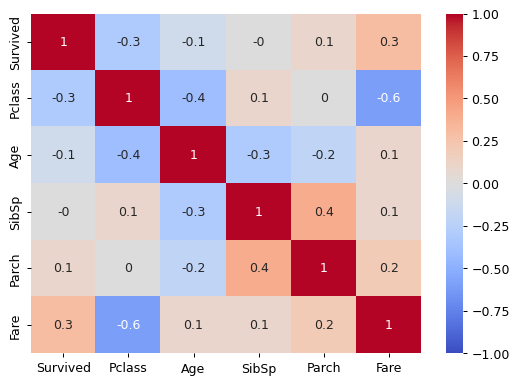

In [9]:
### Para valores numéricos
plt.figure(figsize=(7, 5), dpi= 90)
g = sns.heatmap(train_data.corr().round(1),
                annot=True, center=0, vmin=-1, vmax=1,
                cmap = "coolwarm")
plt.show()

Quase todas as variaveis numéricas parecem influenciar.


*   Melhoria: Poderiamos melhorar verificando se algumas delas não deveriam ser categóricas.
* Possível overfitting: Preço da passagem tem uma relação direta com a classe de viagem e pode não agregar informação por conta própria.


## Categóricos

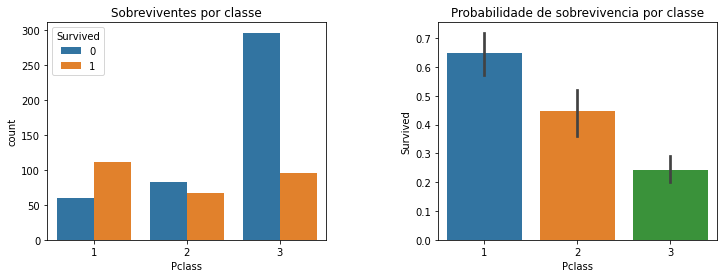

In [10]:
# A classe comprada foi importante para diferenciar a sobrevivencia.
# Ela parece ser mais uma feature categórica do que uma feature continua

# Multiplos plots em mesmo plot:
fig = plt.figure(figsize=(12,4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
sns.countplot(data=train_data, x="Pclass", hue="Survived")
plt.title("Sobreviventes por classe")

ax = fig.add_subplot(1, 2, 2)
sns.barplot(data=train_data, x="Pclass", y="Survived")
plt.title("Probabilidade de sobrevivencia por classe")

plt.show()

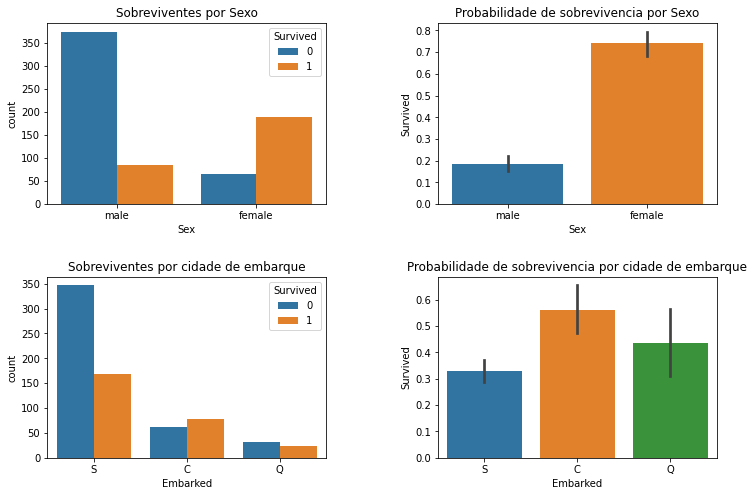

In [11]:
# Para valores categoricos
# A classe comprada foi importante para diferenciar a sobrevivencia.

# Multiplos plots em mesmo plot:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 2, 1)
sns.countplot(data=train_data, x="Sex", hue="Survived")
plt.title("Sobreviventes por Sexo")

ax = fig.add_subplot(2, 2, 2)
sns.barplot(data=train_data, x="Sex", y="Survived")
plt.title("Probabilidade de sobrevivencia por Sexo")

ax = fig.add_subplot(2, 2, 3)
sns.countplot(data=train_data, x="Embarked", hue="Survived")
plt.title("Sobreviventes por cidade de embarque")

ax = fig.add_subplot(2, 2, 4)
sns.barplot(data=train_data, x="Embarked", y="Survived")
plt.title("Probabilidade de sobrevivencia por cidade de embarque")

plt.show()

Variável ticket e nome não iremos utilizar por enquanto.


* Possível overfitting: A cidade de embarque influencia, mas pode ser alguma correlação com outro feature.
* Por exemplo: Será que neste local embarcaram mais pessoas com passagem de classe 3? 

# **MODELOS**
Para dar continuidade ao aprendido na aula, vamos usar apeans o decision tree

Para nosso processo de modelagem, vamos seguir um caminho didático incremental.

A cada etapa vamos criar um modelo novo investigando um resultado diferente.

A análise dos resultados será feita com base em um Cross Validation.

E vamos a cada rodada checar o desempenho em teste.

In [12]:
# Avaliação de resultados
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Modelagem
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import  plot_tree

# Organização em Pipe
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Pre-processamento
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

## **Model Baseline (mulheres sobrevivem, homens morrem)**

Nosso baseline será montado com base no modelo: "todas as mulheres sobrevivem, todos os homens morrem"

Vamos comparar sempre o desempenho de teste a este baseline ingênuo.

### Versão simplificada (sem modelo sklearn)
Vamos criar e testar nossa regra de forma simples.

In [13]:
# Separação do target (usando apenas "Sex")
X_train = train_data['Sex']
y_train = train_data['Survived']

X_val = val_data['Sex']
y_val = val_data['Survived']

In [14]:
# Modelo: Todas as mulheres sobrevivem. Todos os homens morrem.
y_pred = (val_data['Sex'] == 'female').astype(int)

# Análise de resultados - Apenas sexo - métricas de avaliação
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.74      0.65      0.69        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.78      0.77       179



Nosso baseline tem um f1-score ('weighted avg') = 0.77

Ou seja, qualquer modelo criado deve superar esse desempenho em teste, para ser validado.

### Árvore simples (só "Sexo") = Baseline

Como utilizaremos o CV (Kfold) para checar o desempenho em direntes treinos e testes e esta classe precisa de um modelo padrão sklearn. Vamos criar uma arvore que imita o nosso baseline simples.

Com essa árvore podemos usar todas as funções sklearn normalmente.

Vamos utilizar o Pipe para:


1.   Organizar nossa modelagem
2.   Permitir o uso do OrdinalEncoder de forma mais prática.
  *   O ordinal encoder permite transformar as strings "male" e "female" em 0 e 1.  
  




In [15]:
# Separação do target (usando apenas coluna sexo)
X_train = train_data[['Sex']]
y_train = train_data['Survived']

X_val = val_data[['Sex']]
y_val = val_data['Survived']

In [16]:
# Utilizaremos um modelo de árvore com profundidade 1
modelo = DecisionTreeClassifier(random_state=42,
                                max_depth=1)

# O pipe organiza nossos dados
pipe = Pipeline([
                 ('ordinal', OrdinalEncoder()),
                 ('model', modelo)
                 ])

In [17]:
pipe.fit(X=X_train, y=y_train)
y_pred = pipe.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.74      0.65      0.69        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.78      0.77       179



De fato, o modelo apresentou desempenho igual ao baseline.
Podemos verificar também o desenho da árvore abaixo, para constatar o mesmo desenho.

Todos os homens `X[0] = 0` são separados das mulheres `X[0] = 1`


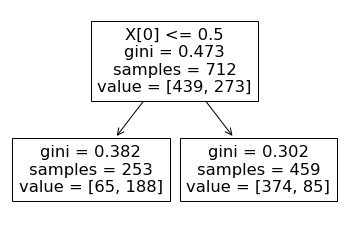

In [18]:
plot_tree(pipe['model'])
plt.show()

### Utilizando o cross_val_score 
O cross_val_score permite avaliar o desempenho do modelo sendo treinado e testado em diversos parcelas diferentes do treino.

Ao analisarmos nosso desempenho, percebemos que desempenho do modelo não é tão estavel, dependendo bastante dos dados utilizados. o que indica baixa generalização. O desempenho varia de .64 a  .74, com uma média de .71.

Ou seja, demos sorte de alcançar .77 no teste. Nosso modelo não é tão confiável.

In [19]:
scores = cross_val_score(pipe, X=X_train, y=y_train,
                         scoring="f1",
                         cv=5, n_jobs=-1)

print("f1 scores: ", np.round(scores, 2))
print("Average f1 score: ", np.round(np.mean(scores), 2))

f1 scores:  [0.72 0.64 0.74 0.74 0.72]
Average f1 score:  0.71


## **Árvore Simples (sem variável "sexo")**
 * Vamos verificar nossa capacidade de previsão usando as outras variáveis que não sejam o sexo.  
 * Usando apenas as colunas numpericas: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
 * Utilizaremos o `SimpleImputer` para preencher os NaN com as medianas de cada coluna
 * Avaliaremos o modelo primeiro pelo cross_validation

In [20]:
# Separação do target (usando apenas colunas "numéricas")
X_train = train_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y_train = train_data['Survived']

X_val = val_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y_val = val_data['Survived']

In [21]:
# Vamos utilizar uma árvore com profundidade limitada, para evitar overfitting
modelo = DecisionTreeClassifier(random_state=42,
                                max_depth=5)

pipe = Pipeline([
                 ("imputer", SimpleImputer(strategy="median")),
                 ('model', modelo)
                 ])

In [22]:
scores = cross_val_score(pipe, X=X_train, y=y_train,
                         scoring="f1",
                         cv=5, n_jobs=-1)

print("f1 scores: ", np.round(scores, 2))
print("Average f1: ", np.round(np.mean(scores), 2))

f1 scores:  [0.46 0.54 0.59 0.56 0.65]
Average f1:  0.56


O desempenho econtrado foi muito inferior ao do modelo de baseline.
Inclusive, o modelo é menos robusto, variando de .46 a .65.
Dessa forma poderiamos descartar o modelo sem verificar o desempenho em teste. Mas vamos vericar o teste mesmo assim.

Deste modelo percebemos a importancia de incluir a variável "Sex".

In [23]:
pipe.fit(X=X_train, y=y_train)
y_pred = pipe.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.88      0.77       110
           1       0.66      0.36      0.47        69

    accuracy                           0.68       179
   macro avg       0.67      0.62      0.62       179
weighted avg       0.68      0.68      0.66       179




**Resultado obtido em teste é pior do que o do baseline, conforme esperado**

Nossos weighted avg "f1-score":  0.66

=(

## **Árvore completa "Sexo" + "Outras"**

In [24]:
# Separação do target
X_train = train_data.drop(columns=['Survived'])
y_train = train_data['Survived']
X_val = val_data.drop(columns=['Survived'])
y_val = val_data['Survived']

In [25]:
modelo = DecisionTreeClassifier(random_state=42,
                                max_depth=5)

# Variáveis numéricas, como serão preprocessadas no pipeline:  
numeric_features = ['Age', "Pclass", 'SibSp','Parch']
numeric_transformer = SimpleImputer(strategy="median")

# Variáveis categóricas, como serão preprocessadas no pipeline: 
categorical_features = ["Sex", "Embarked"]
categorical_transformer = Pipeline([
                          ("imputer", SimpleImputer(strategy="most_frequent")),
                          ("onehot", OrdinalEncoder())
                          ])

# Nosso separador de colunas para realizar o preprocessamento com base em tipo.
preprocessamento = ColumnTransformer([
                ("num", numeric_transformer, numeric_features),
                ("cat", categorical_transformer, categorical_features),
                ])

# Nosso pipeline completo
pipe = Pipeline([
             ("preprocessor", preprocessamento),
             ('model', modelo)
             ])

In [26]:
scores = cross_val_score(pipe, X=X_train, y=y_train,
                         scoring="f1",
                         cv=5, n_jobs=-1)

print("f1 scores: ", np.round(scores, 2))
print("Average f1: ", np.round(np.mean(scores), 2))

f1 scores:  [0.71 0.69 0.79 0.77 0.73]
Average f1:  0.74


Nosso modelo, parece superar o baseline no cross validation. 

Conseguimos uma média de f1 `.74` melhor melhor que o do baselin `.71` e tambem conseguimos resultados com menor variação (modelo mais robusto e mais generalizado).

Deste modo, o modelo está aprovado e vamos levar ele para os dados de validação e verificar o desempenho. Esperamos que o desempenho seja melhor que o do baseline.

In [27]:
pipe.fit(X=X_train, y=y_train)
y_pred = pipe.predict(X_val)

# Análise de resultados - métricas de avaliação
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       110
           1       0.85      0.58      0.69        69

    accuracy                           0.80       179
   macro avg       0.82      0.76      0.77       179
weighted avg       0.81      0.80      0.79       179



Desempenho do f1 de `0.79`, melhor que o `0.77` do baseline. 

Parabéns, conseguimos criar um modelo melhor!

<img src="https://i.kym-cdn.com/entries/icons/original/000/028/021/work.jpg"
     alt="It ain't much, but it's honest work."
     width="400" />

# **CONCLUSÃO**
Conseguimos melhorar nosso f1-score em `.02` apenas.

A árvore de decisão é insuficiente alcançãr um bom desempenho nesses dados.

O adequado será testar outros modelos.

## Vizualizando o modelo final e guardando parametros

In [28]:
# Nosso pipeline ficou desta forma:
from sklearn import set_config
set_config(display="diagram")
display(pipe)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Age', 'Pclass', 'SibSp',
                                                   'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['Sex', 'Embarked'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

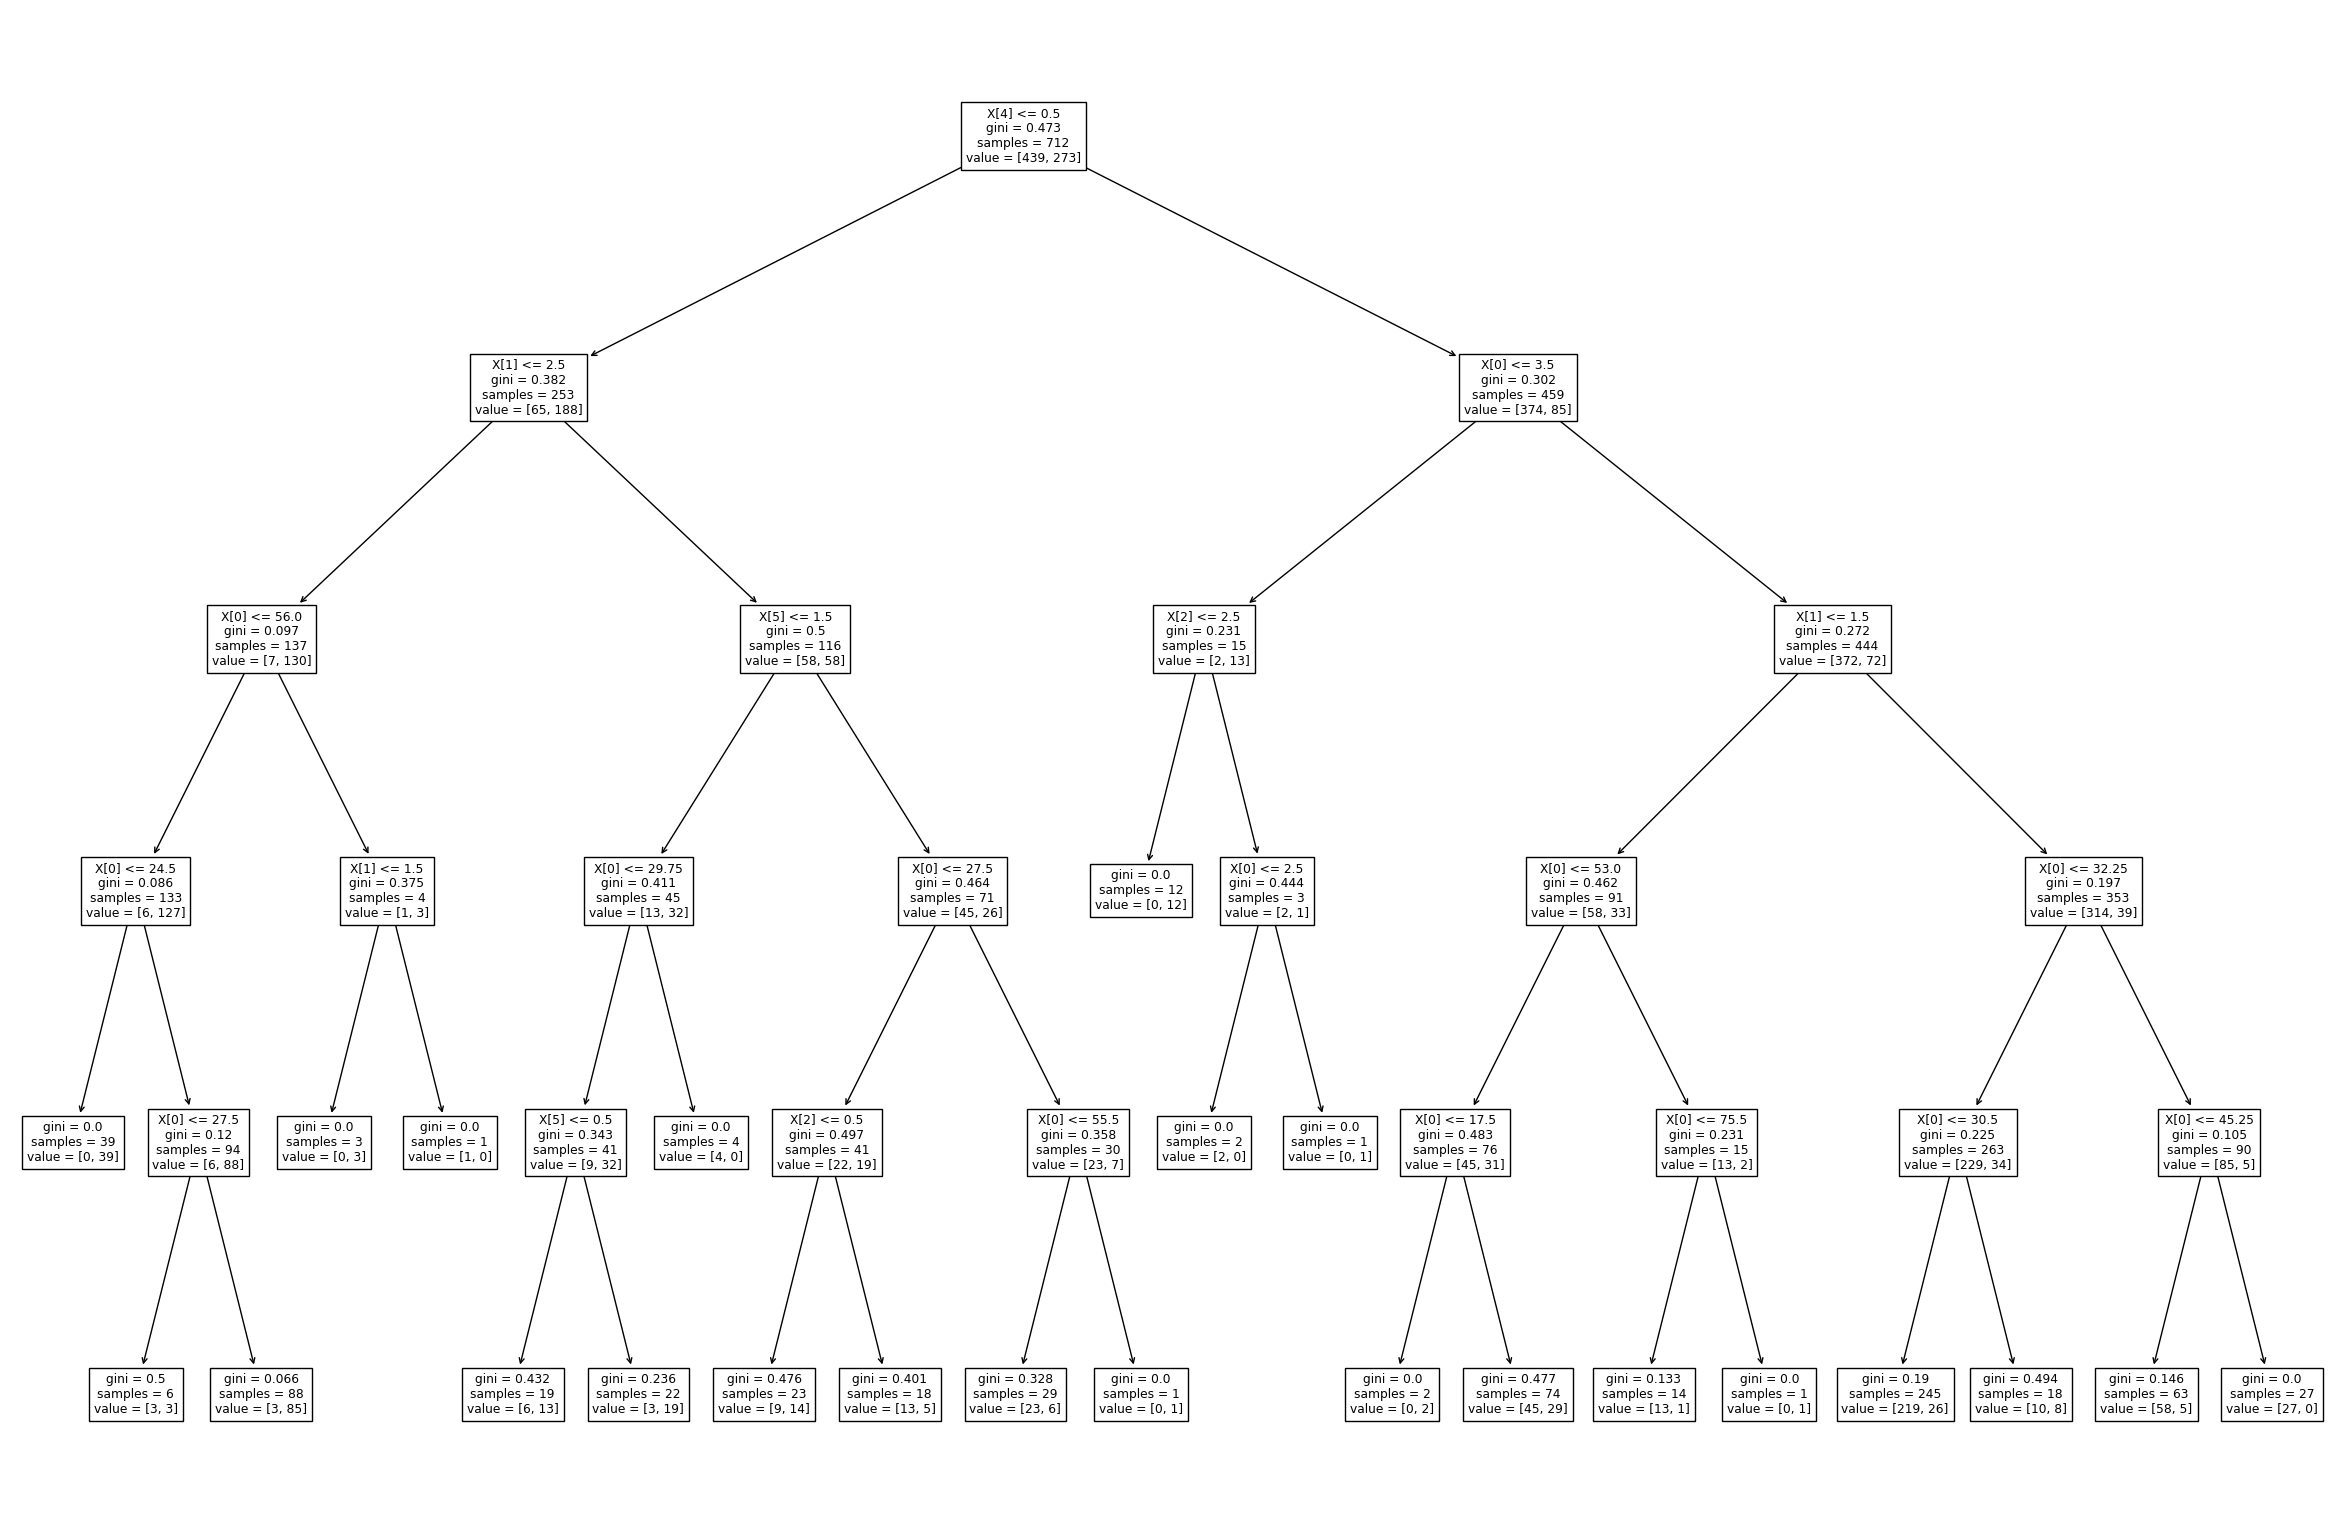

In [29]:
# Nossa árvore ficou desta forma:
plt.figure(figsize=(30, 20), dpi=100)
plot_tree(pipe['model'])
plt.show()

In [30]:
# Se quisermos guardar os parametros utilizados, basta salvar as informações abaixo.
pipe.get_params()

{'memory': None,
 'model': DecisionTreeClassifier(max_depth=5, random_state=42),
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': 5,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__random_state': 42,
 'model__splitter': 'best',
 'preprocessor': ColumnTransformer(transformers=[('num', SimpleImputer(strategy='median'),
                                  ['Age', 'Pclass', 'SibSp', 'Parch']),
                                 ('cat',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehot', OrdinalEncoder())]),
                                  ['Sex', 'Embarked'])]),
 'preprocessor__cat': Pipeline(steps=[('imputer', S

# **RASCUNHOS**
(Ainda não foram utilizados, pode ignorar)

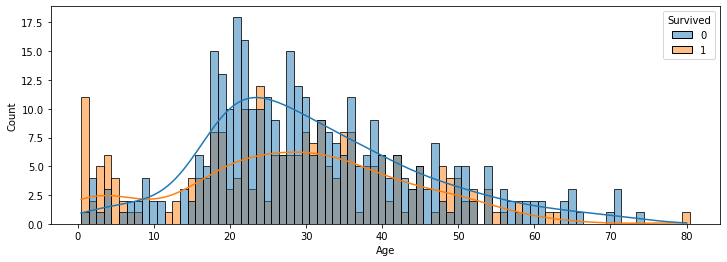

In [31]:
# Pequeno desvio favorecendo os mais jovens. (Mulheres e crianças primeiro?)
fig = plt.figure(figsize=(12,4))
sns.histplot(data=train_data, x="Age", hue = 'Survived', binwidth=1, kde=True);


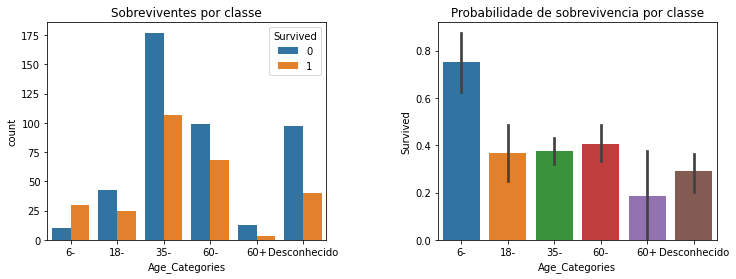

In [32]:
bins = [0, 6, 18, 35, 60, 100,999]
group_names = ['6-', '18-', '35-', '60-', '60+','Desconhecido']

train_data['Age_Categories'] = pd.cut(train_data['Age'], bins, labels=group_names)
train_data['Age_Categories'] = train_data['Age_Categories'].fillna('Desconhecido')


# Idades pequenas ajudam na sobrevivencia.
# Idades desconhecidas parecem facilitar.

# Multiplos plots em mesmo plot:
fig = plt.figure(figsize=(12,4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
sns.countplot(data=train_data, x="Age_Categories", hue="Survived")
plt.title("Sobreviventes por classe")

ax = fig.add_subplot(1, 2, 2)
sns.barplot(data=train_data, x="Age_Categories", y="Survived")
plt.title("Probabilidade de sobrevivencia por classe")

plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression

# Separação do target
X_train = train_data.drop(columns=['Survived'])
y_train = train_data['Survived']
X_val = val_data.drop(columns=['Survived'])
y_val = val_data['Survived']


modelo = LogisticRegression(random_state=42)

# Variáveis numéricas, como serão preprocessadas no pipeline:  
numeric_features = ['Age', "Pclass", 'SibSp','Parch']
numeric_transformer = SimpleImputer(strategy="median")

# Variáveis categóricas, como serão preprocessadas no pipeline: 
categorical_features = ["Sex", "Embarked"]
categorical_transformer = Pipeline([
                          ("imputer", SimpleImputer(strategy="most_frequent")),
                          ("onehot", OrdinalEncoder())
                          ])

# Nosso separador de colunas para realizar o preprocessamento com base em tipo.
preprocessamento = ColumnTransformer([
                ("num", numeric_transformer, numeric_features),
                ("cat", categorical_transformer, categorical_features),
                ])

# Nosso pipeline completo
pipe = Pipeline([
             ("preprocessor", preprocessamento),
             ('model', modelo)
             ])

In [34]:
scores = cross_val_score(pipe, X=X_train, y=y_train,
                         scoring="f1",
                         cv=5, n_jobs=-1)

print("f1 scores: ", np.round(scores, 2))
print("Average f1: ", np.round(np.mean(scores), 2))

f1 scores:  [0.74 0.63 0.75 0.75 0.74]
Average f1:  0.72


In [35]:
pipe.fit(X=X_train, y=y_train)
y_pred = pipe.predict(X_val)

# Análise de resultados - métricas de avaliação
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

